#TAREA 2.2

Importar los precios de Amazon desde Yahoo finance de los últimos 10 años y simular cien mil escenarios de los próximos 30 días para predecir la probabilidad de que el precio actual supere el 8%.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf #librería de yahoo finance, predeterminada solo para google collab

/tmp/ipython-input-2431361333.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(Amazon,start='2015-11-03',end='2025-11-03')['Close'] #Extraemos los precios ajustados al cierre de los últimos 5 años
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

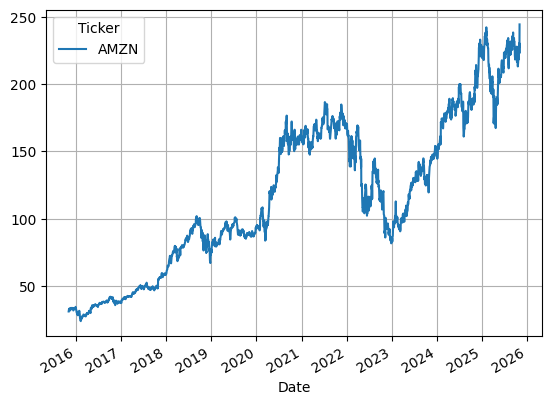

In [5]:
#Amazon es AMZN
Amazon=['AMZN']
data=yf.download(Amazon,start='2015-11-03',end='2025-11-03')['Close'] #Extraemos los precios ajustados al cierre de los últimos 5 años
data.plot(grid=True)

<Axes: xlabel='Date'>

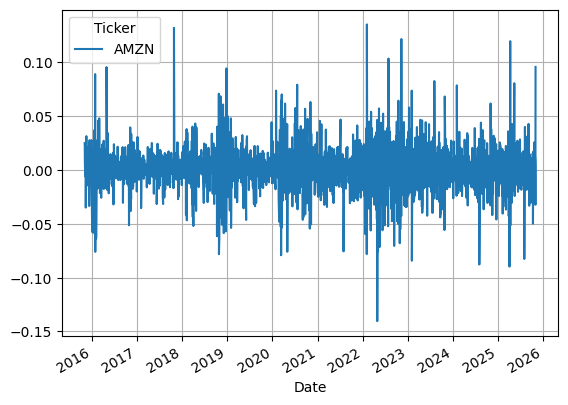

In [6]:
#Diferencia entre el precio actual y el anterior, dividido entre el precio actual
delta=data.pct_change().dropna()
delta.plot(grid=True)

In [7]:
#Puedo considerar que la media es constante

array([[<Axes: title={'center': 'AMZN'}>]], dtype=object)

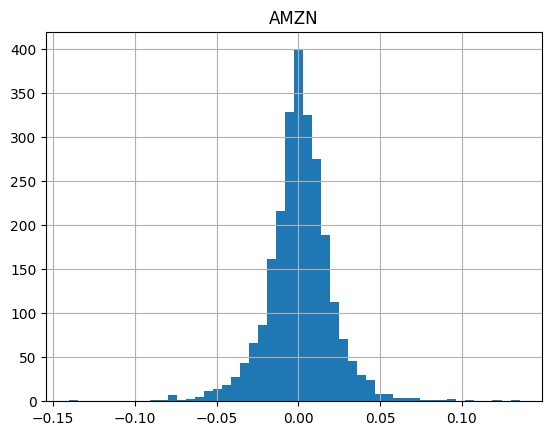

In [8]:
delta.hist(bins=50, grid=True)

In [9]:
#Distribución normal sin cesgos.

In [10]:
#Simulamos los deltas (retorno porcentual)
N_dias=30 #30 días próximos
N_escenarios=100000 #100,000 escenarios
delta_AMZN=np.random.normal(delta['AMZN'].mean(),delta['AMZN'].std(),(N_dias,N_escenarios))
delta_AMZN[:2,:10] #Mostrar los primeros dos días y los primeros 10 escenarios

array([[ 0.00874643,  0.0147664 ,  0.02523874, -0.0575555 ,  0.01151086,
        -0.00584519,  0.01084008, -0.02965683,  0.01431802,  0.0082498 ],
       [-0.00078626, -0.01787296, -0.00386745, -0.03813118,  0.01559043,
        -0.02286755, -0.01238479, -0.04085932, -0.01438133,  0.01904932]])

In [11]:
#Para asociarlo a los días simulados, creamos un rango de tiempo
rango_tiempo=pd.date_range('2025-11-04',periods=N_dias)
rango_tiempo

DatetimeIndex(['2025-11-04', '2025-11-05', '2025-11-06', '2025-11-07',
               '2025-11-08', '2025-11-09', '2025-11-10', '2025-11-11',
               '2025-11-12', '2025-11-13', '2025-11-14', '2025-11-15',
               '2025-11-16', '2025-11-17', '2025-11-18', '2025-11-19',
               '2025-11-20', '2025-11-21', '2025-11-22', '2025-11-23',
               '2025-11-24', '2025-11-25', '2025-11-26', '2025-11-27',
               '2025-11-28', '2025-11-29', '2025-11-30', '2025-12-01',
               '2025-12-02', '2025-12-03'],
              dtype='datetime64[ns]', freq='D')

In [12]:
delta_AMZN=pd.DataFrame(delta_AMZN,index=rango_tiempo)
delta_AMZN

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2025-11-04,0.008746,0.014766,0.025239,-0.057556,0.011511,-0.005845,0.010840,-0.029657,0.014318,0.008250,...,0.013816,-0.009642,0.021120,-0.002276,-0.029113,0.011971,-0.025217,-0.016031,-0.028663,0.024924
2025-11-05,-0.000786,-0.017873,-0.003867,-0.038131,0.015590,-0.022868,-0.012385,-0.040859,-0.014381,0.019049,...,0.023459,0.011209,-0.006906,-0.009543,-0.006903,0.014010,0.025930,0.018493,0.034615,-0.003192
2025-11-06,0.039789,-0.022251,0.032299,-0.025339,0.017150,0.020966,-0.035863,0.005510,-0.002402,-0.011401,...,-0.002516,-0.013237,0.021981,-0.040468,0.006796,0.025573,0.020062,0.018637,0.012377,0.034579
2025-11-07,0.021597,0.003921,0.009293,0.022046,-0.016262,0.011008,0.035759,-0.008347,0.006963,-0.015691,...,-0.004715,-0.006566,0.009747,0.014407,-0.006756,-0.040161,-0.005570,0.048478,0.032307,0.042309
2025-11-08,0.030871,0.004038,-0.012480,0.030897,0.030594,0.025447,0.004391,0.026983,0.022131,0.045799,...,0.022362,0.026297,0.004840,0.007338,-0.001013,0.020529,0.007790,0.017844,0.001630,-0.004836
2025-11-09,-0.029580,0.000175,0.007510,-0.038585,-0.017798,0.009472,-0.016969,0.022810,-0.018014,-0.007990,...,-0.024659,0.031180,0.045147,0.019767,0.005367,-0.006702,-0.010395,0.063070,-0.017318,-0.005088
2025-11-10,0.029853,-0.013737,0.022186,-0.008071,-0.008282,-0.013111,-0.000169,-0.012802,-0.004137,0.005823,...,0.008158,-0.022777,-0.013304,0.014451,0.005500,0.034060,-0.010346,0.031316,0.000824,0.005934
2025-11-11,-0.005774,0.003948,0.003388,0.023360,0.009830,0.025731,-0.004389,0.018799,-0.041196,0.060213,...,-0.005706,-0.001044,-0.027683,0.002350,-0.005255,-0.004274,0.002259,-0.015751,0.045061,0.004232
2025-11-12,0.005138,-0.019864,0.026379,-0.007640,0.019851,-0.005617,0.007085,0.014510,0.001277,-0.005486,...,-0.011720,0.008999,-0.011018,0.013726,0.001610,-0.000949,-0.018582,0.010257,0.016288,0.005117
2025-11-13,0.009030,-0.012488,0.013314,0.018798,-0.000800,-0.001203,-0.006522,-0.017991,-0.018701,0.030552,...,0.019782,-0.009454,-0.006243,0.033192,0.013609,0.011231,-0.011224,-0.008130,0.019395,0.037162


Proyección de precios

$$
P_k=P_0\Pi_{i=1}^k(\Delta_i+1),
$$
_donde $P_k$ es el precio proyectado de la simulación den el periodo $k$, $\Delta_i$ es la variación porcentual simulada en el periodo $i$ y $P_0$ es el último precio conocido._

In [13]:
precios_AMZN=data['AMZN'].iloc[-1]*((delta_AMZN+1).cumprod())
precios_AMZN.iloc[:2,:5] #Primeros dos días, primeras 5 simulaciones, solo pa ver si sirve xd

,0,1,2,3,4
2025-11-04,246.356053,247.826252,250.383807,230.163796,247.031184
2025-11-05,246.162353,243.396865,249.415460,221.387380,250.882506


¿Cuál es la probabilidad al final del mes de que el último valor conocido supere el 8%?

<Axes: >

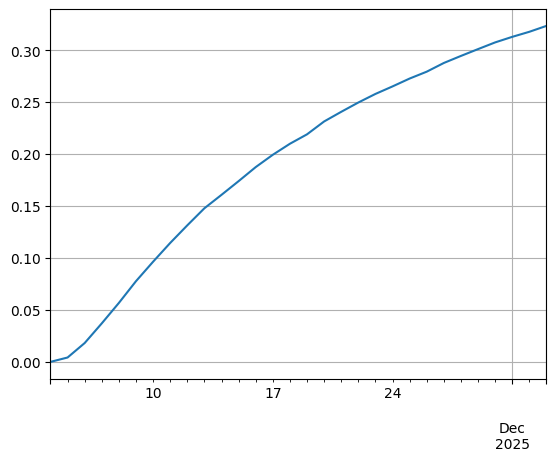

In [14]:
B_AMZN=precios_AMZN>data['AMZN'].iloc[-1]*1.08  #Variable de Bernoulli (Cuántos escenarios satisfacen la condición buscada)
proba_AMZN=B_AMZN.mean(axis=1)
proba_AMZN.plot(grid=True)

Vemos que usando Simulación Montecarlo con 100,000 escenarios, la probabilidad a finales del mes llega a superar momentáneamente el $30$%